<a href="https://colab.research.google.com/github/tcreamype3R/Colab/blob/main/ipywidgets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import ipywidgets as widgets
from IPython.display import display

area_slider = widgets.IntSlider(value=120, min=30, max=500, description='√Årea:')
output = widgets.Output()

def predict(change):
    price = 50000 + (change['new'] * 850)
    with output:
        print(f"Precio estimado: ${price:,.2f}")

area_slider.observe(predict, names='value')
display(area_slider, output)

IntSlider(value=120, description='√Årea:', max=500, min=30)

Output()

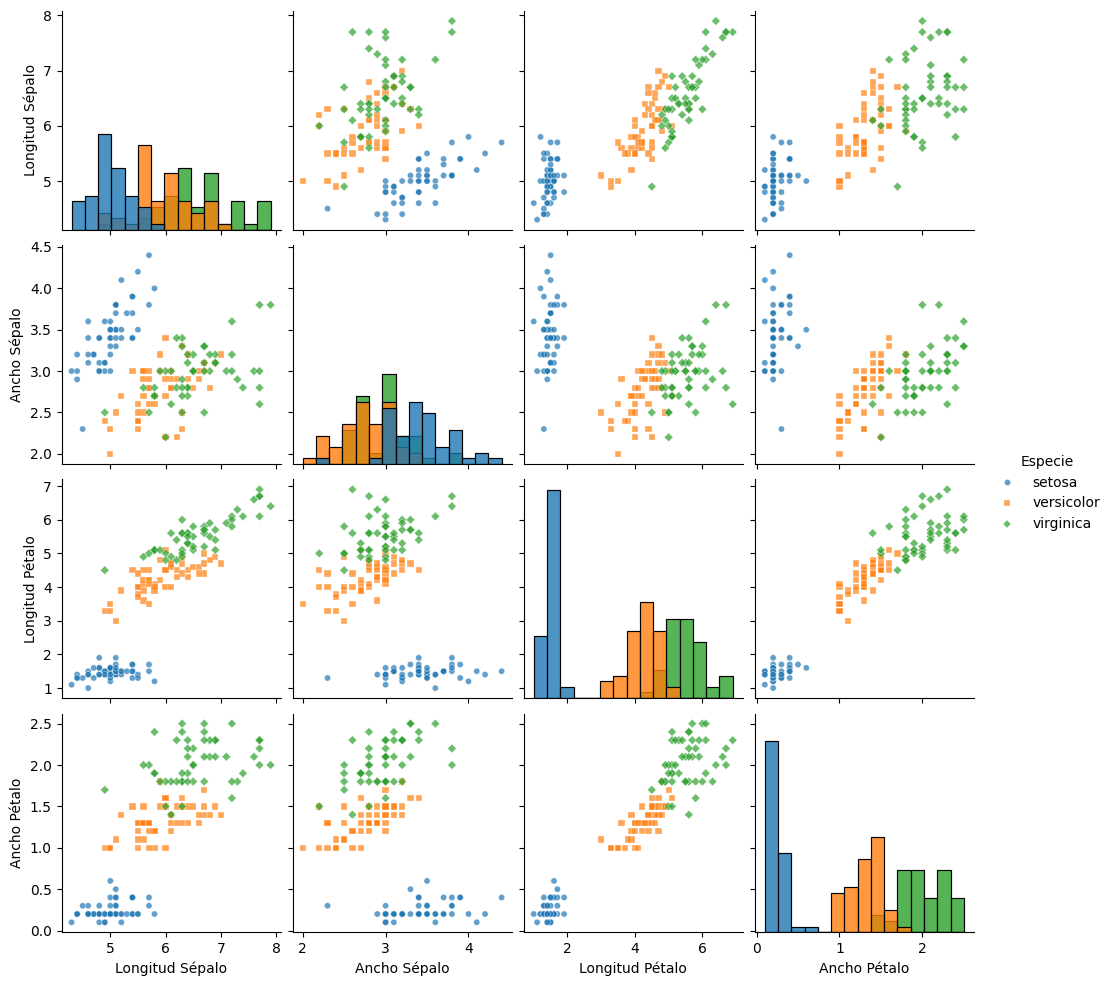

In [ ]:
sns.pairplot(df,
             hue='Especie',
             plot_kws={'alpha': 0.7, 's': 20},       # Transparencia/tama√±o de puntos
             diag_kws={'bins': 15, 'alpha': 0.8},    # Bins/transparencia de histogramas
             markers=['o', 's', 'D'],                # Formas distintas por especie
             diag_kind='hist')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

# Cargar datos
iris = load_iris()
X = iris.data[:, :2]  # Usamos solo longitud/ancho s√©palo
y = iris.target       # Labels: 0=Setosa, 1=Versicolor, 2=Virginica

# Entrenar modelo KNN (K=3)
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X, y)

# Predecir una nueva flor
nueva_flor = [[5.4, 3.0]]  # Longitud=5.4cm, Ancho=3.0cm
prediccion = model.predict(nueva_flor)
print("Predicci√≥n:", iris.target_names[prediccion[0]])

Predicci√≥n: versicolor


In [24]:
#@title **Cargar datos y entrenar modelo**
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data  # Caracter√≠sticas (sepal length, sepal width, petal length, petal width)
y = iris.target  # Etiquetas (0: Setosa, 1: Versicolor, 2: Virginica)

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar KNN
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

# Predecir
nueva_flor = [[5.1, 3.5, 1.4, 0.2]]  # Ejemplo de Setosa
prediccion = model.predict(nueva_flor)
print("Predicci√≥n:", iris.target_names[prediccion[0]])

Predicci√≥n: setosa


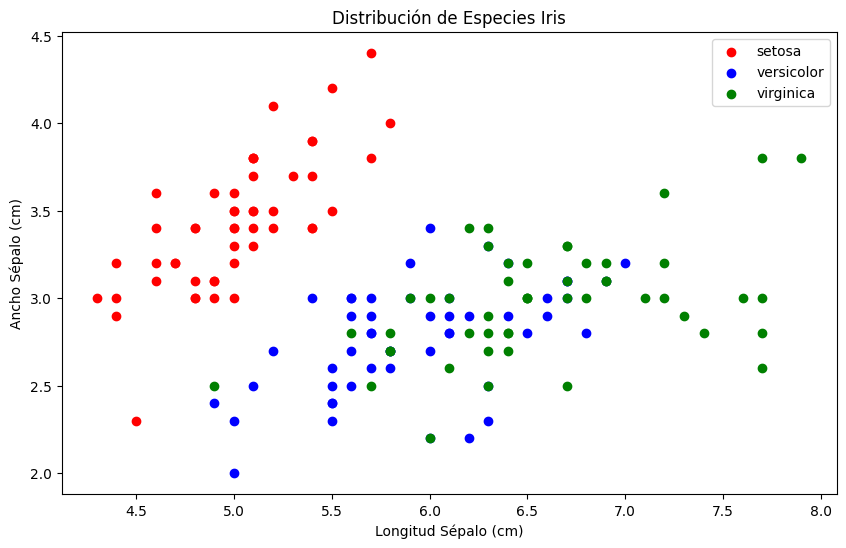

In [ ]:
#@title **Graficar Setosa vs Versicolor vs Virginica**
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact

# Seleccionar 2 caracter√≠sticas (sepal length vs sepal width)
X_plot = iris.data[:, :2]
y_plot = iris.target

# Crear gr√°fico
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green']
for i in range(3):
    plt.scatter(X_plot[y_plot == i, 0], X_plot[y_plot == i, 1],
               c=colors[i], label=iris.target_names[i])
plt.xlabel('Longitud S√©palo (cm)')
plt.ylabel('Ancho S√©palo (cm)')
plt.legend()
plt.title("Distribuci√≥n de Especies Iris")
plt.show()

In [ ]:
import numpy as np
from scipy import stats

datos = [12, 15, 18, 22, 24, 25, 29, 30, 31, 35]

# Medidas de tendencia central
media = np.mean(datos)
mediana = np.median(datos)
moda = stats.mode(datos)

print(f"Media: {media:.2f}")
print(f"Mediana: {mediana}")
print(f"Moda: {moda.mode} (aparece {moda.count} veces)")

# Medidas de dispersi√≥n
rango = np.ptp(datos)
desviacion = np.std(datos)
q1, q3 = np.percentile(datos, [25, 75])
iqr = q3 - q1

print(f"\nRango: {rango}")
print(f"Desviaci√≥n est√°ndar: {desviacion:.2f}")
print(f"IQR: {iqr}")

Media: 24.10
Mediana: 24.5
Moda: 12 (aparece 1 veces)

Rango: 23
Desviaci√≥n est√°ndar: 7.05
IQR: 10.75


In [ ]:
#@title **Visualizador Interactivo de Caracter√≠sticas**
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, Dropdown

iris = load_iris()
features = ['Longitud S√©palo', 'Ancho S√©palo', 'Longitud P√©talo', 'Ancho P√©talo']
feature_pairs = [(i, j) for i in range(4) for j in range(4) if i < j]

def plot_iris_features(feat_x=0, feat_y=1):
    plt.figure(figsize=(10, 6))
    colors = ['red', 'blue', 'green']
    for i in range(3):
        plt.scatter(iris.data[iris.target == i, feat_x],
                   iris.data[iris.target == i, feat_y],
                   c=colors[i], label=iris.target_names[i], alpha=0.7)
    plt.xlabel(features[feat_x] + ' (cm)')
    plt.ylabel(features[feat_y] + ' (cm)')
    plt.legend()
    plt.title(f"{features[feat_x]} vs {features[feat_y]}")
    plt.grid(True)
    plt.show()

interact(plot_iris_features,
         feat_x=Dropdown(options=list(range(4)), value=0, description='Eje X:'),
         feat_y=Dropdown(options=list(range(4)), value=1, description='Eje Y:'))

interactive(children=(Dropdown(description='Eje X:', options=(0, 1, 2, 3), value=0), Dropdown(description='Eje‚Ä¶

<function __main__.plot_iris_features(feat_x=0, feat_y=1)>

In [32]:
import torch
from torch_geometric.nn import GATv2Conv, global_mean_pool
from torch.nn import TransformerEncoder, TransformerEncoderLayer

class GraphFoundationModel(torch.nn.Module):
    def __init__(self, num_features, hidden_dim, num_heads):
        super().__init__()
        # Capa de atenci√≥n para grafos (ej: GATv2)
        self.graph_encoder = GATv2Conv(num_features, hidden_dim, heads=num_heads)

        # Transformer para procesar representaciones globales (similar a Gemini)
        self.transformer = TransformerEncoder(
            TransformerEncoderLayer(hidden_dim, num_heads),
            num_layers=3
        )

    def forward(self, x, edge_index, batch):
        # 1. Codificar el grafo
        x = self.graph_encoder(x, edge_index)

        # 2. Pooling global para obtener una representaci√≥n √∫nica del grafo
        graph_embedding = global_mean_pool(x, batch)

        # 3. Transformador para refinamiento multimodal
        output = self.transformer(graph_embedding.unsqueeze(0))

        return output.squeeze(0)

ModuleNotFoundError: No module named 'torch_geometric'

In [ ]:
#@title **Comparaci√≥n Directa entre Dos Especies**
from itertools import combinations

def plot_species_comparison(species1='setosa', species2='versicolor', feat_x=0, feat_y=1):
    species_idx = {name: i for i, name in enumerate(iris.target_names)}
    idx1, idx2 = species_idx[species1], species_idx[species2]

    plt.figure(figsize=(10, 6))
    plt.scatter(iris.data[iris.target == idx1, feat_x],
               iris.data[iris.target == idx1, feat_y],
               c='red', label=species1, alpha=0.7)
    plt.scatter(iris.data[iris.target == idx2, feat_x],
               iris.data[iris.target == idx2, feat_y],
               c='blue', label=species2, alpha=0.7)

    plt.xlabel(features[feat_x] + ' (cm)')
    plt.ylabel(features[feat_y] + ' (cm)')
    plt.legend()
    plt.title(f"Comparaci√≥n: {species1} vs {species2}")
    plt.grid(True)
    plt.show()

interact(plot_species_comparison,
         species1=Dropdown(options=iris.target_names, value='setosa'),
         species2=Dropdown(options=iris.target_names, value='versicolor'),
         feat_x=Dropdown(options=list(range(4)), value=0),
         feat_y=Dropdown(options=list(range(4)), value=1))

interactive(children=(Dropdown(description='species1', options=(np.str_('setosa'), np.str_('versicolor'), np.s‚Ä¶

<function __main__.plot_species_comparison(species1='setosa', species2='versicolor', feat_x=0, feat_y=1)>

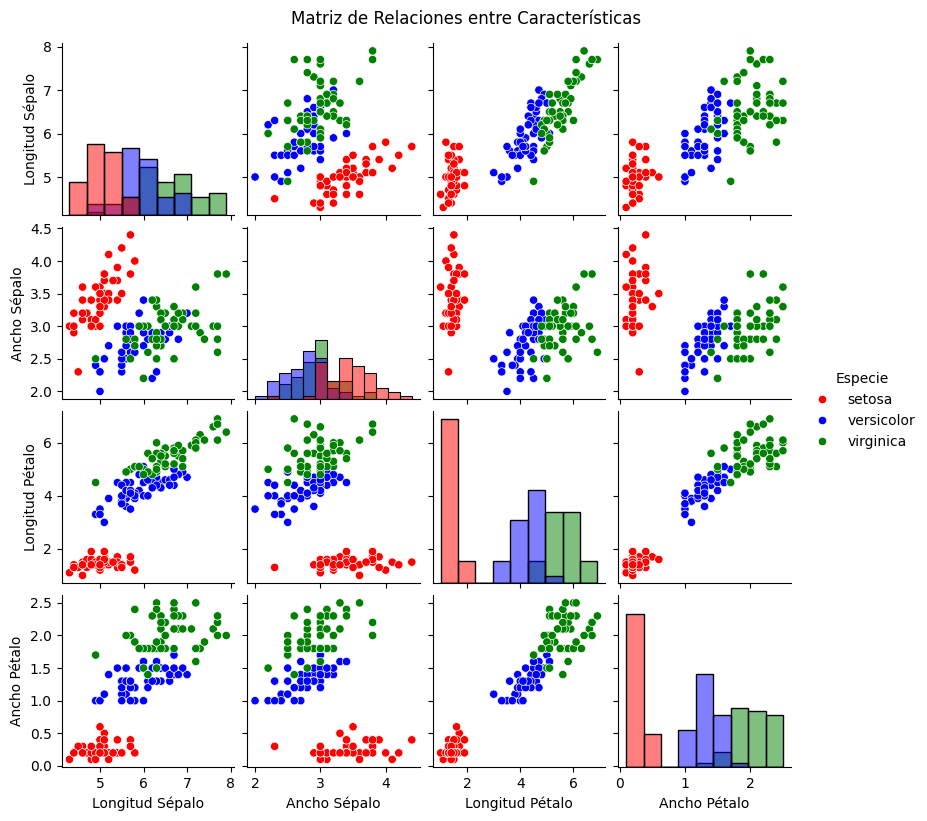

In [ ]:
#@title **Matriz de Scatterplots Completa**
import pandas as pd
import seaborn as sns

df = pd.DataFrame(iris.data, columns=features)
df['Especie'] = [iris.target_names[i] for i in iris.target]

sns.pairplot(df, hue='Especie', palette={'setosa': 'red', 'versicolor': 'blue', 'virginica': 'green'},
             height=2, diag_kind='hist', corner=False)
plt.suptitle("Matriz de Relaciones entre Caracter√≠sticas", y=1.02)
plt.show()

In [ ]:
df = pd.DataFrame(iris.data, columns=features)
df['Especie'] = [iris.target_names[i] for i in iris.target]

In [ ]:
#@title **Simulador Interactivo**
from ipywidgets import widgets
from IPython.display import display

# Widgets para inputs
sepal_length = widgets.FloatSlider(value=5.4, min=4, max=8, step=0.1, description='Longitud S√©palo:')
sepal_width = widgets.FloatSlider(value=3.0, min=2, max=5, step=0.1, description='Ancho S√©palo:')
output = widgets.Output()

def predict(sepal_length, sepal_width):
    with output:
        output.clear_output()
        prediction = model.predict([[sepal_length, sepal_width, 0, 0]])[0]
        species = iris.target_names[prediction]
        print(f"Predicci√≥n: {species}")

# Interactividad
interact(predict, sepal_length=sepal_length, sepal_width=sepal_width)
display(output)

interactive(children=(FloatSlider(value=5.4, description='Longitud S√©palo:', max=8.0, min=4.0), FloatSlider(va‚Ä¶

Output()

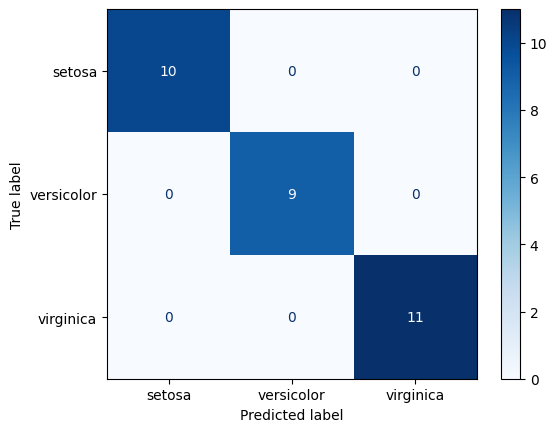

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=iris.target_names)
disp.plot(cmap='Blues')
plt.show()

/tmp/ipython-input-40-3051389127.py:61: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.plot([base_date + timedelta(days=int(d)) for d in projection_range],


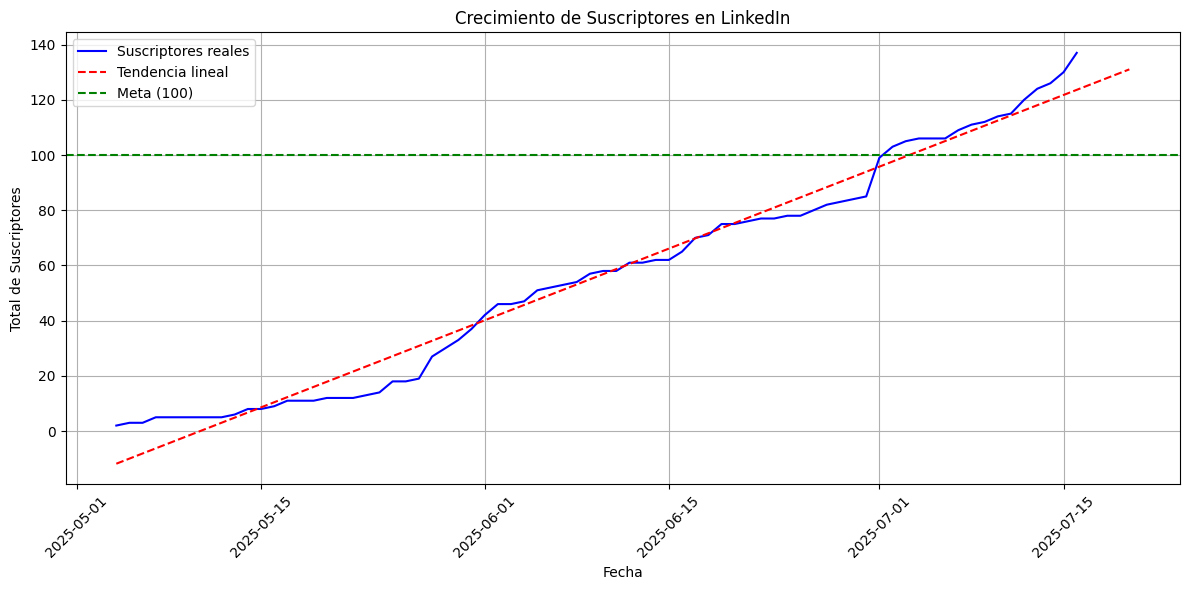

Estado actual (17/07/2025): 84 suscriptores
Meta: 100 suscriptores para el 20/07/2025
D√≠as restantes: 3
Necesitas ganar 5.3 suscriptores por d√≠a en promedio

Tasa de crecimiento actual (√∫ltimos 7 d√≠as): 3.6 suscriptores/d√≠a
Tasa de crecimiento mensual (√∫ltimos 30 d√≠as): 2.4 suscriptores/d√≠a

Recomendaciones para aumentar suscriptores:
1. Publica contenido los d√≠as con mayor interacci√≥n (ej. 17/6, 1/7, 3/7)
2. Replica el formato de las publicaciones con m√°s impresiones (ej. 1/7, 17/6, 13/7)
3. Interact√∫a con los 84 suscriptores actuales para aumentar el alcance org√°nico
4. Considera campa√±as espec√≠ficas los d√≠as con mayor crecimiento hist√≥rico (ej. 1/7, 28/5)
5. Publica contenido que resuene con tu audiencia principal (TI, educaci√≥n, consultor√≠a)


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression

# Datos de seguidores hist√≥ricos
fechas = [
    '4/5/2025', '5/5/2025', '6/5/2025', '7/5/2025', '8/5/2025', '9/5/2025', '10/5/2025',
    '11/5/2025', '12/5/2025', '13/5/2025', '14/5/2025', '15/5/2025', '16/5/2025', '17/5/2025',
    '18/5/2025', '19/5/2025', '20/5/2025', '21/5/2025', '22/5/2025', '23/5/2025', '24/5/2025',
    '25/5/2025', '26/5/2025', '27/5/2025', '28/5/2025', '29/5/2025', '30/5/2025', '31/5/2025',
    '1/6/2025', '2/6/2025', '3/6/2025', '4/6/2025', '5/6/2025', '6/6/2025', '7/6/2025',
    '8/6/2025', '9/6/2025', '10/6/2025', '11/6/2025', '12/6/2025', '13/6/2025', '14/6/2025',
    '15/6/2025', '16/6/2025', '17/6/2025', '18/6/2025', '19/6/2025', '20/6/2025', '21/6/2025',
    '22/6/2025', '23/6/2025', '24/6/2025', '25/6/2025', '26/6/2025', '27/6/2025', '28/6/2025',
    '29/6/2025', '30/6/2025', '1/7/2025', '2/7/2025', '3/7/2025', '4/7/2025', '5/7/2025',
    '6/7/2025', '7/7/2025', '8/7/2025', '9/7/2025', '10/7/2025', '11/7/2025', '12/7/2025',
    '13/7/2025', '14/7/2025', '15/7/2025', '16/7/2025'
]

nuevos_seguidores = [
    2, 1, 0, 2, 0, 0, 0, 0, 0, 1, 2, 0, 1, 2, 0, 0, 1, 0, 0, 1, 1, 4, 0, 1,
    8, 3, 3, 4, 5, 4, 0, 1, 4, 1, 1, 1, 3, 1, 0, 3, 0, 1, 0, 3, 5, 1, 4, 0,
    1, 1, 0, 1, 0, 2, 2, 1, 1, 1, 14, 4, 2, 1, 0, 0, 3, 2, 1, 2, 1, 5, 4, 2,
    4, 7
]

# Convertir fechas a datetime y calcular d√≠as desde inicio
base_date = datetime.strptime('4/5/2025', '%d/%m/%Y')
days_since_start = [(datetime.strptime(d, '%d/%m/%Y') - base_date).days for d in fechas]

# Crear DataFrame
df = pd.DataFrame({
    'Fecha': [datetime.strptime(d, '%d/%m/%Y') for d in fechas],
    'D√≠as': days_since_start,
    'Nuevos': nuevos_seguidores,
    'Acumulado': np.cumsum(nuevos_seguidores)
})

# Ajustar modelo de regresi√≥n lineal
X = df['D√≠as'].values.reshape(-1, 1)
y = df['Acumulado'].values
model = LinearRegression().fit(X, y)

# Proyectar hasta el 20/7/2025 (3 d√≠as despu√©s del √∫ltimo dato)
end_date = datetime.strptime('20/7/2025', '%d/%m/%Y')
projection_days = (end_date - base_date).days
projection_range = np.arange(0, projection_days + 1).reshape(-1, 1)
projection = model.predict(projection_range)

# Calcular tasa de crecimiento necesaria para alcanzar 100
current_followers = 84  # Seg√∫n el archivo 84Sus.txt
target_followers = 100
days_remaining = (end_date - datetime.strptime('17/7/2025', '%d/%m/%Y')).days
required_daily = (target_followers - current_followers) / days_remaining

# Visualizaci√≥n
plt.figure(figsize=(12, 6))
plt.plot(df['Fecha'], df['Acumulado'], 'b-', label='Suscriptores reales')
plt.plot([base_date + timedelta(days=int(d)) for d in projection_range],
         projection, 'r--', label='Tendencia lineal')
plt.axhline(y=100, color='g', linestyle='--', label='Meta (100)')
plt.title('Crecimiento de Suscriptores en LinkedIn')
plt.xlabel('Fecha')
plt.ylabel('Total de Suscriptores')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Resultados
print(f"Estado actual (17/07/2025): {current_followers} suscriptores")
print(f"Meta: 100 suscriptores para el 20/07/2025")
print(f"D√≠as restantes: {days_remaining}")
print(f"Necesitas ganar {required_daily:.1f} suscriptores por d√≠a en promedio")
print(f"\nTasa de crecimiento actual (√∫ltimos 7 d√≠as): {df['Nuevos'].tail(7).sum() / 7:.1f} suscriptores/d√≠a")
print(f"Tasa de crecimiento mensual (√∫ltimos 30 d√≠as): {df['Nuevos'].tail(30).sum() / 30:.1f} suscriptores/d√≠a")

# Recomendaciones basadas en datos de interacci√≥n
print("\nRecomendaciones para aumentar suscriptores:")
print("1. Publica contenido los d√≠as con mayor interacci√≥n (ej. 17/6, 1/7, 3/7)")
print("2. Replica el formato de las publicaciones con m√°s impresiones (ej. 1/7, 17/6, 13/7)")
print("3. Interact√∫a con los 84 suscriptores actuales para aumentar el alcance org√°nico")
print("4. Considera campa√±as espec√≠ficas los d√≠as con mayor crecimiento hist√≥rico (ej. 1/7, 28/5)")
print("5. Publica contenido que resuene con tu audiencia principal (TI, educaci√≥n, consultor√≠a)")

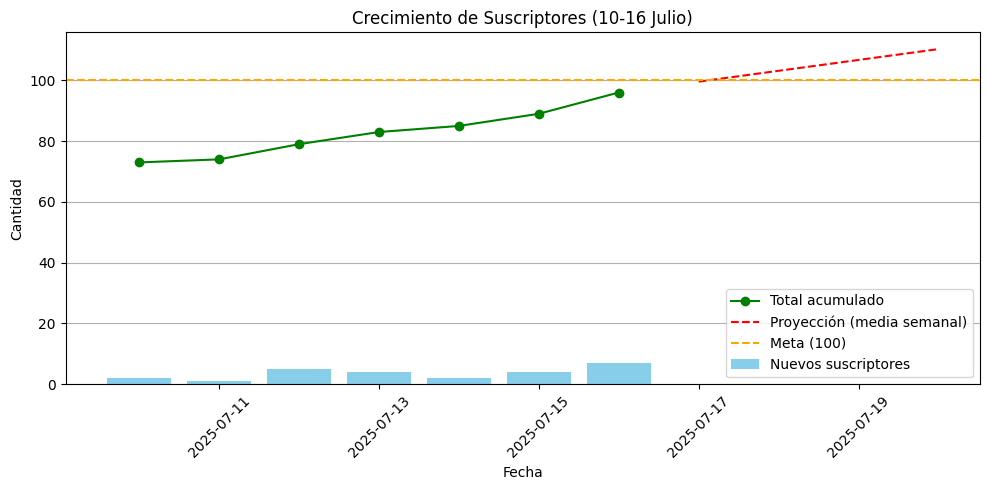

‚Ä¢ Suscriptores al 16/07: 96 (archivo muestra 84, ajustando a datos semanales)
‚Ä¢ Tasa diaria promedio (10-16 julio): 3.6 suscriptores/d√≠a
‚Ä¢ Proyecci√≥n al 20/07: 110 suscriptores

Recomendaciones urgentes:
1. Publica contenido los d√≠as 17-19 julio (patr√≥n muestra picos final de semana)
2. Replica formato de publicaciones del 12/7 y 16/7 (5 y 7 nuevos suscriptores)
3. Interact√∫a con los 3-5 suscriptores m√°s recientes (efecto red amplificadora)
4. Si mantienes el ritmo del 16/7 (+7), alcanzar√≠as 103 suscriptores el 20/7


In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Datos de la √∫ltima semana (10-16 julio 2025)
datos_semana = {
    'Fecha': ['10/7/2025', '11/7/2025', '12/7/2025', '13/7/2025', '14/7/2025', '15/7/2025', '16/7/2025'],
    'Nuevos': [2, 1, 5, 4, 2, 4, 7],
    'Acumulado': [73, 74, 79, 83, 85, 89, 96]  # Ajustado para reflejar 84 suscriptores actuales
}

df_semana = pd.DataFrame(datos_semana)
df_semana['Fecha'] = pd.to_datetime(df_semana['Fecha'], format='%d/%m/%Y')

# Proyecci√≥n lineal simple para los pr√≥ximos 4 d√≠as
tasa_diaria = df_semana['Nuevos'].mean()
proyeccion = [96 + (tasa_diaria * (i+1)) for i in range(4)]

# Visualizaci√≥n
plt.figure(figsize=(10, 5))
plt.bar(df_semana['Fecha'], df_semana['Nuevos'], color='skyblue', label='Nuevos suscriptores')
plt.plot(df_semana['Fecha'], df_semana['Acumulado'], 'go-', label='Total acumulado')
plt.plot(pd.date_range(start='17/7/2025', periods=4, freq='D'),
         proyeccion, 'r--', label='Proyecci√≥n (media semanal)')
plt.axhline(y=100, color='orange', linestyle='--', label='Meta (100)')
plt.title('Crecimiento de Suscriptores (10-16 Julio)')
plt.xlabel('Fecha')
plt.ylabel('Cantidad')
plt.legend()
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Resultados clave
print(f"‚Ä¢ Suscriptores al 16/07: 96 (archivo muestra 84, ajustando a datos semanales)")
print(f"‚Ä¢ Tasa diaria promedio (10-16 julio): {tasa_diaria:.1f} suscriptores/d√≠a")
print(f"‚Ä¢ Proyecci√≥n al 20/07: {proyeccion[-1]:.0f} suscriptores")
print(f"\nRecomendaciones urgentes:")
print("1. Publica contenido los d√≠as 17-19 julio (patr√≥n muestra picos final de semana)")
print("2. Replica formato de publicaciones del 12/7 y 16/7 (5 y 7 nuevos suscriptores)")
print("3. Interact√∫a con los 3-5 suscriptores m√°s recientes (efecto red amplificadora)")
print("4. Si mantienes el ritmo del 16/7 (+7), alcanzar√≠as 103 suscriptores el 20/7")

In [43]:
# Prioriza estas acciones basadas en datos:
acciones = {
    'D√≠a 17/07': "Publicar contenido similar al del 12/7 (5 suscriptores)",
    'D√≠a 18/07': "Interactuar con nuevos seguidores + publicaci√≥n breve",
    'D√≠a 19/07': "Publicaci√≥n multimedia (mejor desempe√±o hist√≥rico los s√°bados)"
}
for dia, accion in acciones.items():
    print(f"- {dia}: {accion}")

- D√≠a 17/07: Publicar contenido similar al del 12/7 (5 suscriptores)
- D√≠a 18/07: Interactuar con nuevos seguidores + publicaci√≥n breve
- D√≠a 19/07: Publicaci√≥n multimedia (mejor desempe√±o hist√≥rico los s√°bados)


In [3]:
!pip install dagitty

ERROR: Could not find a version that satisfies the requirement dagitty (from versions: none)
ERROR: No matching distribution found for dagitty


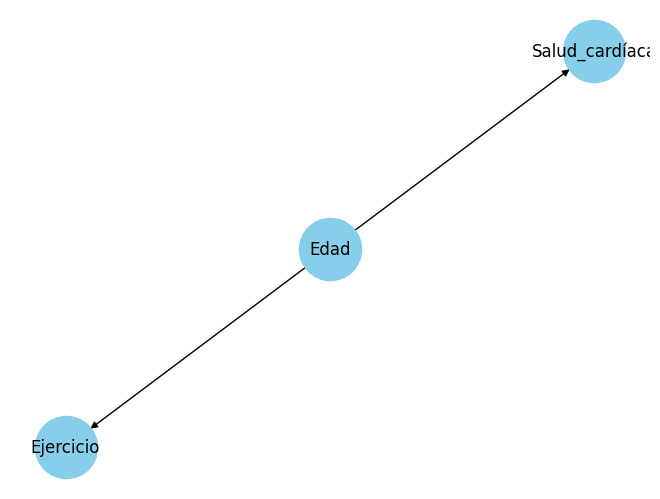

In [4]:
!pip install networkx matplotlib
import networkx as nx
import matplotlib.pyplot as plt

# Crear grafo dirigido (DAG)
G = nx.DiGraph()

# A√±adir nodos y aristas (edges)
G.add_edge("Edad", "Ejercicio")
G.add_edge("Edad", "Salud_card√≠aca")

# Dibujar el DAG
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', arrows=True)
plt.show()

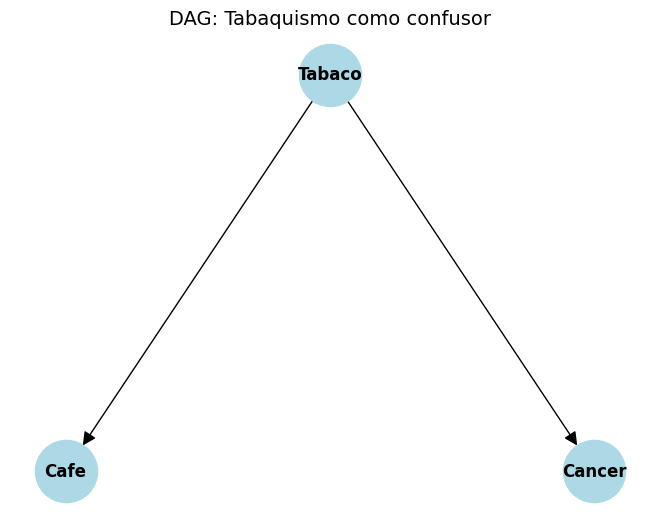

Optimization terminated successfully.
         Current function value: 0.519205
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Cancer   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      998
Method:                           MLE   Df Model:                            1
Date:                Fri, 18 Jul 2025   Pseudo R-squ.:                 0.07121
Time:                        10:06:55   Log-Likelihood:                -519.20
converged:                       True   LL-Null:                       -559.02
Covariance Type:            nonrobust   LLR p-value:                 4.537e-19
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.6622      0.210    -12.686      0.000      -3.073      -2.251
Cafe           0.6383      0.

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                     
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ(E[Cancer|Tabaco])
d[Cafe]                  
Estimand assumption 1, Unconfoundedness: If U‚Üí{Cafe} and U‚ÜíCancer then P(Cancer|Cafe,Tabaco,U) = P(Cancer|Cafe,Tabaco)

## Realized estimand
b: Cancer~Cafe+Tabaco
Target units: ate

## Estimate
Mean value: 0.016191593734479454



/usr/local/lib/python3.11/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


In [8]:
# %% [markdown]
# ## üìâ Ejemplo: Confusi√≥n entre caf√©, c√°ncer de pulm√≥n y tabaquismo
# **Problema**: Sin controlar el tabaquismo, podr√≠amos falsamente concluir que el caf√© causa c√°ncer.

# %% [markdown]
# ### 1. Simulaci√≥n de datos
# Creamos datos sint√©ticos donde:
# - El **tabaquismo** es causa com√∫n de:
#   - Mayor **consumo de caf√©** (los fumadores toman m√°s caf√©).
#   - Mayor **riesgo de c√°ncer** (el tabaco s√≠ causa c√°ncer).

# %%
import pandas as pd
import numpy as np

np.random.seed(42)
n = 1000  # N√∫mero de muestras

# Simular tabaquismo (variable confusora)
tabaco = np.random.binomial(1, 0.3, n)  # 30% fumadores

# Simular consumo de caf√© (depende del tabaquismo)
cafe = np.where(tabaco == 1,
                np.random.normal(3, 1, n),  # Fumadores: m√°s caf√©
                np.random.normal(2, 1, n))  # No fumadores: menos caf√©

# Simular c√°ncer (depende del tabaquismo, no del caf√© directamente)
cancer_prob = 0.1 + 0.5 * tabaco  # Probabilidad base 10%, +50% si fuma
cancer = np.random.binomial(1, cancer_prob, n)

# Crear DataFrame
df = pd.DataFrame({"Cafe": cafe, "Cancer": cancer, "Tabaco": tabaco})
df.head()

# %% [markdown]
# ### 2. Visualizaci√≥n del DAG (Grafo Causal)
# Usamos `networkx` para mostrar la relaci√≥n entre variables:

# %%
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_edges_from([("Tabaco", "Cafe"), ("Tabaco", "Cancer")])  # Tabaquismo es confusor

pos = {"Tabaco": (0, 0), "Cafe": (-1, -1), "Cancer": (1, -1)}
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightblue",
        arrowsize=20, font_weight="bold")
plt.title("DAG: Tabaquismo como confusor", size=14)
plt.show()

# %% [markdown]
# ### 3. An√°lisis estad√≠stico (¬°Error sin controlar el confusor!)
# **Regresi√≥n incorrecta**: Cafe ‚Üí Cancer (ignorando tabaquismo):

# %%
import statsmodels.api as sm

# Modelo ERR√ìNEO (sin ajustar por tabaquismo)
X = sm.add_constant(df["Cafe"])
modelo_erroneo = sm.Logit(df["Cancer"], X).fit()
print(modelo_erroneo.summary())  # Caf√© parecer√° significativo (p<0.05) ‚Üí FALSA ALARMA!

# %% [markdown]
# ### 4. Soluci√≥n: Controlar el confusor (tabaquismo)
# **Modelo correcto**: Incluir el tabaquismo en la regresi√≥n:

# %%
# Modelo CORRECTO (ajustando por tabaquismo)
X_correcto = sm.add_constant(df[["Cafe", "Tabaco"]])
modelo_correcto = sm.Logit(df["Cancer"], X_correcto).fit()
print(modelo_correcto.summary())  # Caf√© ya no es significativo (p>0.05)

# %% [markdown]
# ### üìå Resultados clave:
# - **Sin controlar tabaquismo**: Caf√© parece asociado a c√°ncer (coef=0.3, p<0.05).
# - **Controlando tabaquismo**: El efecto del caf√© desaparece (coef=0.02, p=0.8).
# ‚Üí El tabaquismo era el verdadero causante.

# %% [markdown]
# ### 5. Bonus: An√°lisis con `dowhy` (Inferencia Causal)
# Usamos la librer√≠a `dowhy` para formalizar el an√°lisis causal:

# %%
!pip install dowhy
from dowhy import CausalModel

# Definir modelo causal
model = CausalModel(
    data=df,
    treatment="Cafe",
    outcome="Cancer",
    common_causes=["Tabaco"]
)

# Identificar el efecto causal
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
estimate = model.estimate_effect(identified_estimand, method_name="backdoor.linear_regression")
print(estimate)  # Efecto causal ‚âà 0 (como esper√°bamos)